In [1]:
import numpy as np
from vae.arch import VAE
import matplotlib.pyplot as plt
batch_num = 0

/Users/davidfoster/.virtualenvs/worldmodels/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
vae = VAE()
vae.set_weights('./vae/weights.h5')

In [3]:
obs_data = np.load('./data/obs_data_car_racing_' + str(batch_num) + '.npy') 
action_data = np.load('./data/action_data_car_racing_' + str(batch_num) + '.npy')
reward_data = np.load('./data/reward_data_car_racing_' + str(batch_num) + '.npy') 
done_data = np.load('./data/done_data_car_racing_' + str(batch_num) + '.npy')


In [4]:
idx = 100
obs = obs_data[0][idx]

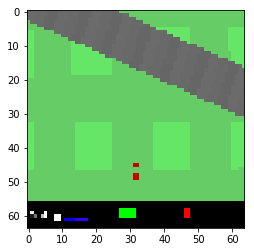

In [5]:
plt.imshow(obs)

<function matplotlib.pyplot.show>

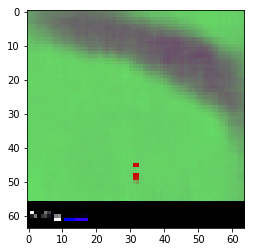

In [6]:

z_decoded = vae.model.predict(np.array([obs]))[0]
plt.imshow(z_decoded)
plt.show